# Metis Take Home Practise
Alexandra Phelan

In [1]:
import urllib
import os
import zipfile
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
import numpy as np
from sklearn import preprocessing
from sklearn.cross_validation import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.cross_validation import cross_val_score

%matplotlib inline
pd.options.display.float_format = '{:20,.2f}'.format
pd.options.display.max_columns = 40
pd.options.display.max_rows = 200

/home/aliphelan/.local/lib/python2.7/site-packages/IPython/html.py:14: ShimWarning: The `IPython.html` package has been deprecated since IPython 4.0. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)
/home/aliphelan/.local/lib/python2.7/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


### Question 1
- Programmatically acquire, load, and prepare CitiBike data for the year 2015
- How many data points are there in the data used for analysis?

#### Download files

In [2]:
get_file = urllib.URLopener()

#files all have same dl url except month number
start_url = 'https://s3.amazonaws.com/tripdata/2015'
end_url = '-citibike-tripdata.zip'

# download files from url and save to 'data' folder
for i in range(1, 13):
    i = str(i)
    if len(i) < 2:
        url = start_url + '0' + i + end_url
        file_loc = 'data/0' + i + '2015.zip'
    else:
        url = start_url + i + end_url
        file_loc = 'data/' + i + '2015.zip'
    get_file.retrieve(url, file_loc)

#### Unzip files

In [6]:
dir_name = 'data'
ext = '.zip'

In [4]:
# unzip all files and delete zip file
for f in os.listdir(dir_name):
    if f.endswith(ext):
        file_name = dir_name + '/' + f
        zip_ref = zipfile.ZipFile(file_name)
        zip_ref.extractall(dir_name)
        zip_ref.close()
        os.remove(file_name)

#### Load files

In [9]:
ext = '.csv'
citibike_df = pd.DataFrame()

In [10]:
# load csv files and store data into citibike_df
for f in os.listdir(dir_name):
    if f.endswith(ext):
        file_name = dir_name + '/' + f
        df = pd.read_csv(file_name)
        citibike_df = citibike_df.append(df)

In [11]:
citibike_df.head()

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender
0,1338,6/1/2015 0:00,6/1/2015 0:22,128,MacDougal St & Prince St,40.73,-74.00,2021,W 45 St & 8 Ave,40.76,-73.99,20721,Subscriber,"1,984.00",1
1,290,6/1/2015 0:00,6/1/2015 0:05,438,St Marks Pl & 1 Ave,40.73,-73.99,312,Allen St & E Houston St,40.72,-73.99,21606,Subscriber,"1,997.00",1
2,634,6/1/2015 0:01,6/1/2015 0:11,383,Greenwich Ave & Charles St,40.74,-74.00,388,W 26 St & 10 Ave,40.75,-74.00,16595,Subscriber,"1,993.00",1
3,159,6/1/2015 0:01,6/1/2015 0:04,361,Allen St & Hester St,40.72,-73.99,531,Forsyth St & Broome St,40.72,-73.99,16949,Subscriber,"1,981.00",1
4,1233,6/1/2015 0:02,6/1/2015 0:22,382,University Pl & E 14 St,40.73,-73.99,532,S 5 Pl & S 4 St,40.71,-73.96,17028,Customer,nan,0


#### Prepare Data

In [12]:
citibike_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9937969 entries, 0 to 1212276
Data columns (total 15 columns):
tripduration               int64
starttime                  object
stoptime                   object
start station id           int64
start station name         object
start station latitude     float64
start station longitude    float64
end station id             int64
end station name           object
end station latitude       float64
end station longitude      float64
bikeid                     int64
usertype                   object
birth year                 float64
gender                     int64
dtypes: float64(5), int64(5), object(5)
memory usage: 1.2+ GB


In [13]:
# rename columns
citibike_df.columns = ['trip_duration', 
                       'start_time', 
                       'end_time',
                       'start_stn_id',
                       'start_stn_name',
                       'start_stn_lat',
                       'start_stn_long',
                       'end_stn_id',
                       'end_stn_name',
                       'end_stn_lat',
                       'end_stn_long',
                       'bike_id',
                       'user_type',
                       'birth_year',
                       'gender'
                      ]

In [14]:
def to_time(date_string):
    '''
    converts start and end times to datetime object. 
    '''
    try:
        dt = datetime.strptime(date_string, '%m/%d/%Y %H:%M:%S')
    except ValueError:
        dt = datetime.strptime(date_string, '%m/%d/%Y %H:%M')
    return dt

In [15]:
# convert to datetime objects
citibike_df['start_time'] = citibike_df['start_time'].apply(to_time)
citibike_df['end_time'] = citibike_df['end_time'].apply(to_time)

In [16]:
# pickle for later
with open('citibike.pk1', 'wb') as picklefile:
    pickle.dump(citibike_df, picklefile)

In [8]:
# open pickled dataframe
with open('citibike.pk1', 'rb') as picklefile:
    citibike_df = pickle.load(picklefile)

#### Number of data points

In [18]:
len(citibike_df)

9937969

### Question 2
- Plot the distribution of the trip duration
- Describe the structure and hypotheses you have about that structure

In [19]:
citibike_df.describe()

,trip_duration,start_stn_id,start_stn_lat,start_stn_long,end_stn_id,end_stn_lat,end_stn_long,bike_id,birth_year,gender
count,"9,937,969.00","9,937,969.00","9,937,969.00","9,937,969.00","9,937,969.00","9,937,969.00","9,937,969.00","9,937,969.00","8,626,591.00","9,937,969.00"
mean,968.09,618.13,40.74,-73.99,610.60,40.74,-73.99,"19,452.89","1,976.55",1.07
std,"7,609.49",734.75,0.02,0.01,724.16,0.02,0.01,"2,859.06",11.57,0.57
min,60.00,72.00,40.65,-74.02,72.00,40.65,-74.05,"14,529.00","1,885.00",0.00
25%,389.00,314.00,40.72,-74.00,312.00,40.72,-74.00,"16,983.00","1,969.00",1.00
50%,629.00,432.00,40.74,-73.99,428.00,40.74,-73.99,"19,387.00","1,979.00",1.00
75%,"1,049.00",502.00,40.75,-73.98,499.00,40.75,-73.98,"22,100.00","1,986.00",1.00
max,"5,864,661.00","3,242.00",40.79,-73.93,"3,242.00",40.79,-73.93,"24,769.00","1,999.00",2.00


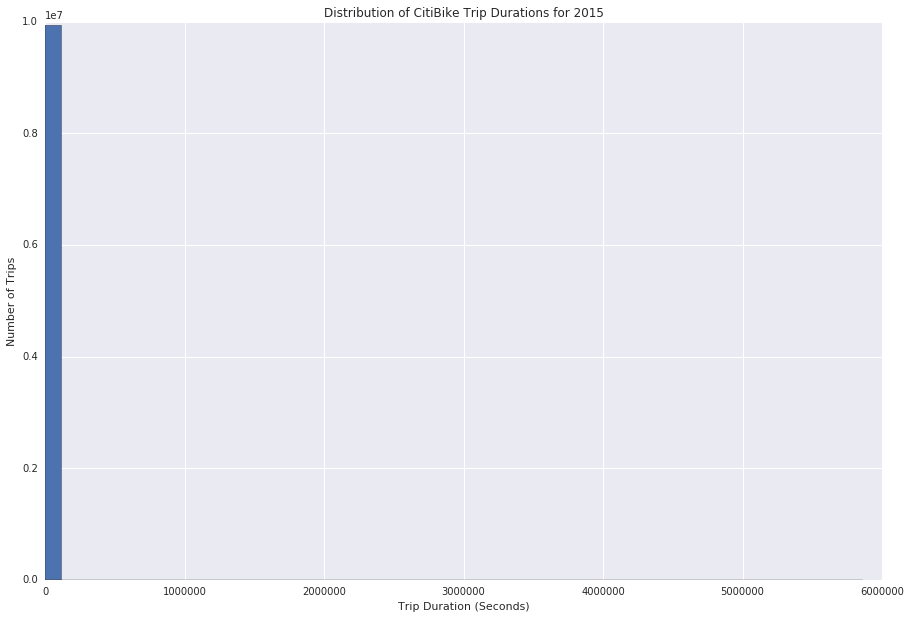

In [49]:
# plot trip duration distribution
plt.figure(figsize=(15,10))
plt.hist(citibike_df['trip_duration'], bins=50);
plt.title("Distribution of CitiBike Trip Durations for 2015");
plt.xlabel('Trip Duration (Seconds)');
plt.ylabel('Number of Trips');

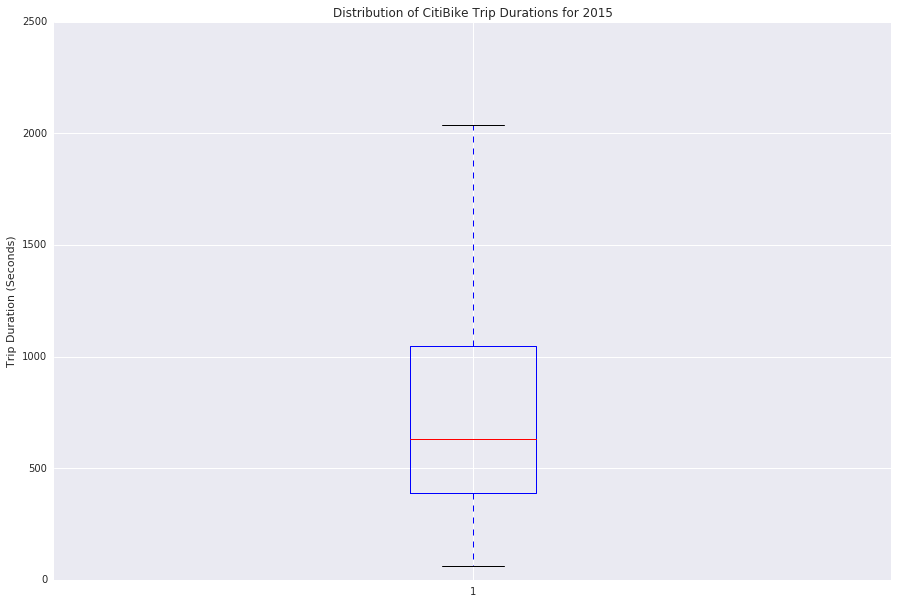

In [50]:
# plot boxplot of trip duration
plt.figure(figsize=(15,10))
plt.boxplot(citibike_df['trip_duration'], showfliers=False);
plt.title("Distribution of CitiBike Trip Durations for 2015")
plt.ylabel('Trip Duration (Seconds)')

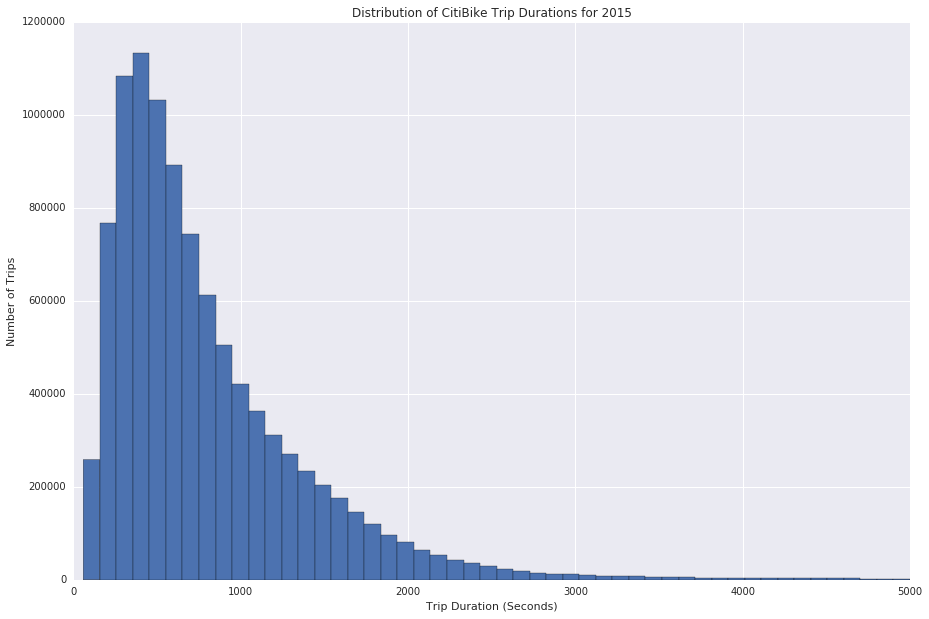

In [51]:
# plot distribution of trips less than 5,000 seconds (approx 83 mins)
plt.figure(figsize=(15,10))
plt.hist(citibike_df[citibike_df['trip_duration'] < 5000]['trip_duration'], 
         bins=50);
plt.title("Distribution of CitiBike Trip Durations for 2015");
plt.xlabel('Trip Duration (Seconds)');
plt.ylabel('Number of Trips');

The distribution of trip durations is heavily right skewed. With the exception of outliers, most trips are less than 30 mins with the average trip time being approximately 16.5 mins. My hypothesis would be that the majority of CitiBike users are commuters who use the bikes to get from point A to point B rather than using the bikes for a leasure activity. A second hypothesis would be that some of the outlier trips lasting multiple days/months may be due to theft. 

### Question 3
- Make a plot of the total number of trips per hour of the day
- What does this plot look like if days are broken into weekdays vs weekends? What does this usage pattern tell you?
- Find another interesting way to segment all or some of the data. Discuss your findings

#### Total Number of trips per hour of the day

In [53]:
# add column for the hour that the trip started
citibike_df['trip_start_hr'] = citibike_df['start_time'].apply(lambda x: x.hour)

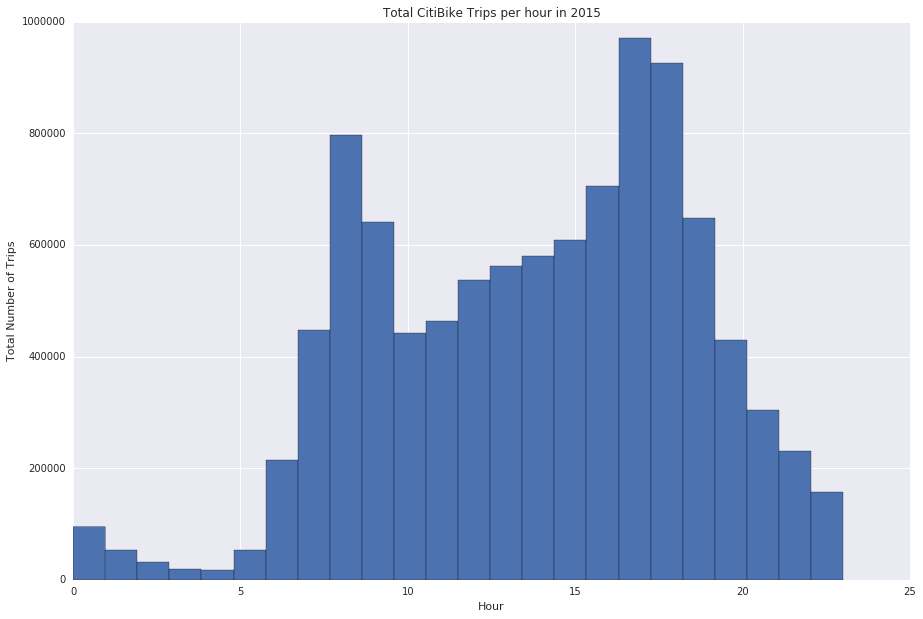

In [54]:
# plot distribution of trips per hour
plt.figure(figsize=(15,10))
plt.hist(citibike_df['trip_start_hr'], bins=24);
plt.title("Total CitiBike Trips per hour in 2015");
plt.xlabel('Hour');
plt.ylabel('Total Number of Trips');

#### Total Number of trips per hour of the day on weekends

In [6]:
# add column for if trip started on a weekend (True) or not (False)
citibike_df['start_weekend'] = citibike_df['start_time'].apply(lambda x: x.weekday() > 4)

In [7]:
# subset weekend and weekday trips
weekend = citibike_df[citibike_df.start_weekend == True]
weekday = citibike_df[citibike_df.start_weekend == False]

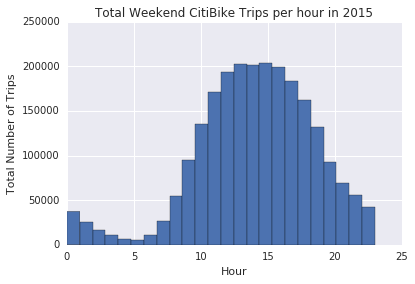

In [8]:
# plot distribution of trips per hour on weekends
plt.figure(figsize=(15,10))
plt.hist(weekend['trip_start_hr'], bins=24);
plt.title("Total Weekend CitiBike Trips per hour in 2015");
plt.xlabel('Hour');
plt.ylabel('Total Number of Trips');

#### Total Number of trips per hour of the day during the week

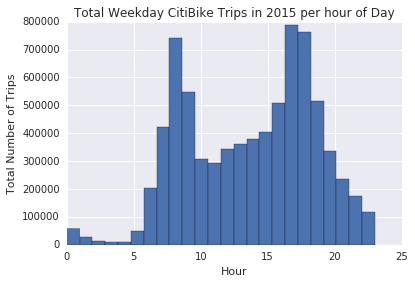

In [9]:
# plot distribution of trips per hour on weekdays
plt.figure(figsize=(15,10))
plt.hist(weekday['trip_start_hr'], bins=24);
plt.title("Total Weekday CitiBike Trips in 2015 per hour of Day");
plt.xlabel('Hour');
plt.ylabel('Total Number of Trips');

#### Plot of all three totals on one graph

In [10]:
# column for trip date (no time)
citibike_df['trip_start_date'] = citibike_df['start_time'].apply(lambda x: x.date())

In [11]:
# column of 1's to sum daily trips per hour
citibike_df['num_trips'] = 1

In [12]:
# sum number of trips started per hour for each day 
hourly_trips_df = citibike_df.groupby(['trip_start_date', 'trip_start_hr'], as_index=False)['num_trips'].sum()

# add column for trips starting on weekend (True) or not (False)
hourly_trips_df['start_weekend'] = hourly_trips_df['trip_start_date'].apply(lambda x: x.weekday() > 4)

In [13]:
# sum total trips per hour
per_hour = hourly_trips_df.groupby(['trip_start_hr'], as_index=False)['num_trips'].sum()

# sum total trips per hour on weekday
per_hour_weekday = hourly_trips_df[hourly_trips_df.start_weekend == False].groupby(['trip_start_hr'], as_index=False)['num_trips'].sum()

# sum total trips per hour on weekends
per_hour_weekend = hourly_trips_df[hourly_trips_df.start_weekend == True].groupby(['trip_start_hr'], as_index=False)['num_trips'].sum()

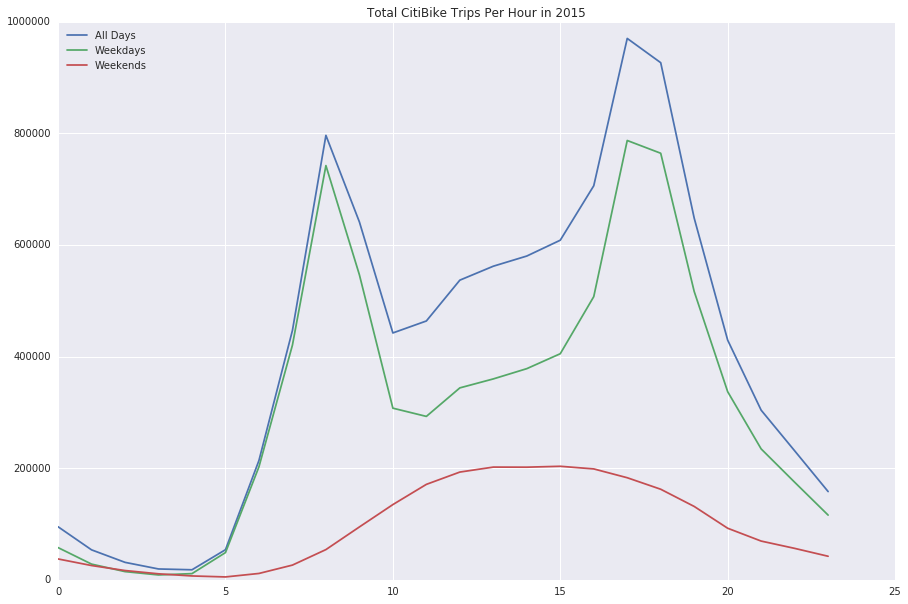

In [27]:
# plot all trips per hour, per hour on weekday, per hour on weekend
plt.figure(figsize=(15,10))
plt.plot(per_hour.trip_start_hr, per_hour.num_trips, label='All Days');
plt.plot(per_hour_weekday.trip_start_hr, per_hour_weekday.num_trips, label='Weekdays');
plt.plot(per_hour_weekend.trip_start_hr, per_hour_weekend.num_trips, label='Weekends');
plt.title('Total CitiBike Trips Per Hour in 2015')
plt.legend(loc='upper left')

We can see from the above graph that the busiest hours for CitiBike trips over all days are during the morning and evening rush hours. These trips take place predomenately during weekdays when people are commuting to and from work. Weekend CitiBike use is not as active and weekdays, but on the weekend, the busiest hours are in the middle of the day.

#### Segment by Month

In [18]:
# add month column to df
hourly_trips_df['trip_start_month'] = hourly_trips_df['trip_start_date'].apply(lambda x: x.month
hourly_trips_df.head()

,trip_start_date,trip_start_hr,num_trips,start_weekend,trip_start_month
0,2015-01-01,0,114,False,1
1,2015-01-01,1,152,False,1
2,2015-01-01,2,146,False,1
3,2015-01-01,3,83,False,1
4,2015-01-01,4,40,False,1


In [20]:
# sum trips per hour by month
monthly_trips_df = hourly_trips_df.groupby(['trip_start_month', 'trip_start_hr'], as_index=False)['num_trips'].sum()
monthly_trips_df.head()

,trip_start_month,trip_start_hr,num_trips
0,1,0,2428
1,1,1,1439
2,1,2,979
3,1,3,606
4,1,4,664


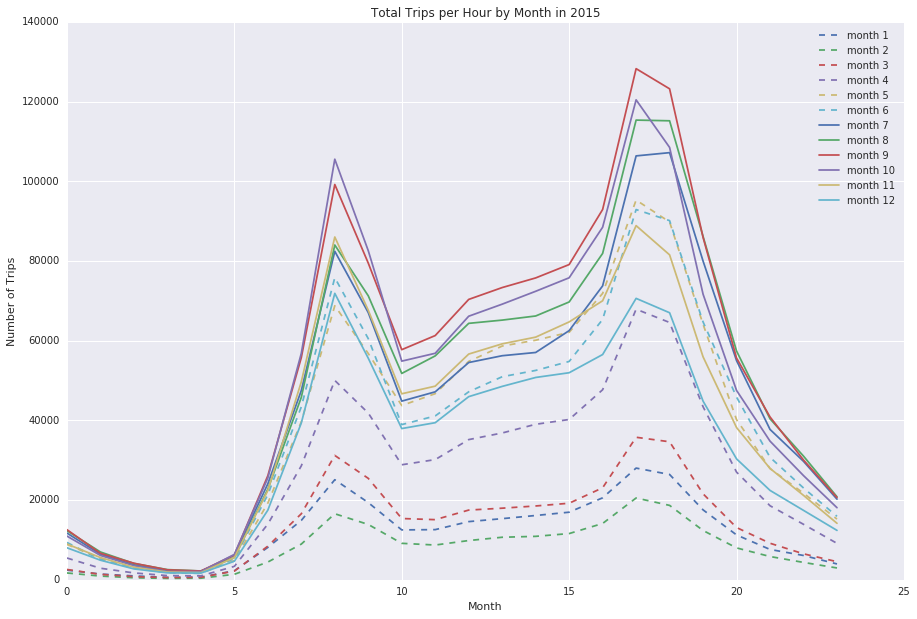

In [33]:
# plot total trips per hour by month
fig, ax = plt.subplots(figsize=(15, 10))
for i, group in monthly_trips_df.groupby('trip_start_month'):
    if i > 6:
        ax.plot(group.trip_start_hr, group.num_trips, label='month ' + str(i))
    else:
        ax.plot(group.trip_start_hr, group.num_trips, label='month ' + str(i), linestyle='--')
ax.legend()
plt.title('Total Trips per Hour by Month in 2015')
plt.xlabel('Month') 
plt.ylabel('Number of Trips')

From the above graph we can see that CitiBike trips are most popular during the fall months, September and October, as well as the summer months July and August, especially in the evenings. As expected the winter has the least amount of city bike trips with significantly lower numbers in January, February, and March.

### Question 4
- There are instances where a bike's next trip originates from a different station than it was returned to for its most recent previous trip. What do you think causes this?
- Explore this phemomenon

My hypothesis would be that certain stations might have more bikes leaving than arriving to that station or vice versa, and so bikes are moved by CitiBike to the stations where they are needed. 

In [69]:
# sum total trips leaving the start station
start_stn_df = citibike_df.groupby(['start_stn_id', 'start_stn_name'], as_index=False)['num_trips'].sum()
start_stn_df.columns = ['station_id', 'stn_name', 'num_start_trips']

In [70]:
# sum total trips ending at the end station
end_stn_df = citibike_df.groupby(['end_stn_id', 'end_stn_name'], as_index=False)['num_trips'].sum()
end_stn_df.columns = ['station_id', 'stn_name', 'num_end_trips']

In [71]:
# merge start and end dataframes
stn_trips = pd.merge(start_stn_df, end_stn_df, on=['station_id', 'stn_name'], how='outer')

# create column for difference between number of bikes leaving and arriving at stations
stn_trips['difference'] = abs(stn_trips.num_start_trips - stn_trips.num_end_trips)

In [72]:
# sort value with largest difference at top
stn_trips.sort_values(['difference'], inplace=True, ascending=False)

In [75]:
stn_trips.head(10)

,station_id,stn_name,num_start_trips,num_end_trips,difference
301,521,8 Ave & W 31 St,"100,796.00",83286,"17,510.00"
309,529,W 42 St & 8 Ave,"60,495.00",46387,"14,108.00"
273,492,W 33 St & 7 Ave,"45,575.00",57549,"11,974.00"
297,517,Pershing Square South,"50,675.00",38895,"11,780.00"
299,519,Pershing Square North,"104,813.00",95783,"9,030.00"
115,324,DeKalb Ave & Hudson Ave,"12,931.00",21181,"8,250.00"
291,511,E 14 St & Avenue B,"49,620.00",41944,"7,676.00"
487,3230,Penn Station Valet,"16,467.00",9173,"7,294.00"
300,520,W 52 St & 5 Ave,"27,223.00",33339,"6,116.00"
258,477,W 41 St & 8 Ave,"64,620.00",69938,"5,318.00"


We see that certain bike stations have more bikes leaving the station while other stations have more bikes ending there. If no bikes were ever moved, then at the end of 2015 there would be thousands of extra bikes at some stations while others would never have any bikes at them. Since this is not the case, then bikes must be moved between stations. 

### Question 5
- Build a predictive model for the total number of daily CitiBike trips. This model should include at least some features from an external data source.
- Evaluate your model, discuss pros/cons, and alternative approaches.

In [2]:
# open pickled dataframe
with open('citibike.pk1', 'rb') as picklefile:
    citibike_df = pickle.load(picklefile)

In [3]:
# column for trip date (no time)
citibike_df['date'] = citibike_df['start_time'].apply(lambda x: x.date())

In [4]:
# column for number of trips
citibike_df['num_trips'] = 1

In [5]:
citibike_df.head()

,trip_duration,start_time,end_time,start_stn_id,start_stn_name,start_stn_lat,start_stn_long,end_stn_id,end_stn_name,end_stn_lat,end_stn_long,bike_id,user_type,birth_year,gender,date,num_trips
0,1338,2015-06-01 00:00:00,2015-06-01 00:22:00,128,MacDougal St & Prince St,40.73,-74.00,2021,W 45 St & 8 Ave,40.76,-73.99,20721,Subscriber,"1,984.00",1,2015-06-01,1
1,290,2015-06-01 00:00:00,2015-06-01 00:05:00,438,St Marks Pl & 1 Ave,40.73,-73.99,312,Allen St & E Houston St,40.72,-73.99,21606,Subscriber,"1,997.00",1,2015-06-01,1
2,634,2015-06-01 00:01:00,2015-06-01 00:11:00,383,Greenwich Ave & Charles St,40.74,-74.00,388,W 26 St & 10 Ave,40.75,-74.00,16595,Subscriber,"1,993.00",1,2015-06-01,1
3,159,2015-06-01 00:01:00,2015-06-01 00:04:00,361,Allen St & Hester St,40.72,-73.99,531,Forsyth St & Broome St,40.72,-73.99,16949,Subscriber,"1,981.00",1,2015-06-01,1
4,1233,2015-06-01 00:02:00,2015-06-01 00:22:00,382,University Pl & E 14 St,40.73,-73.99,532,S 5 Pl & S 4 St,40.71,-73.96,17028,Customer,nan,0,2015-06-01,1


In [6]:
citi_daily = citibike_df.groupby(['date'], as_index=False)['num_trips'].sum()

In [7]:
citi_daily.head()

,date,num_trips
0,2015-01-01,5317
1,2015-01-02,11304
2,2015-01-03,4478
3,2015-01-04,7849
4,2015-01-05,14506


In [8]:
# column for day of week
def weekday(date):
    '''
    retuns day of the week for date
    '''
    # get weekday num from date
    d = date.weekday()
    # change to string with day of week
    days = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
    return days[d]

citi_daily['weekday'] = citi_daily['date'].apply(weekday)

In [9]:
# column for month
def month(date):
    '''
    returns month of date
    '''
    # get month num from date
    d = date.month
    #change to string with month
    months = ['months', 'Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
    return months[d]
    
citi_daily['month'] = citi_daily['date'].apply(month)

In [10]:
# read in weather data
weather_df = pd.read_csv('data/weather_underground_nyc_2015.csv')
weather_df.head()

,date,temp_f_hi,temp_f_avg,temp_f_low,dew_f_hi,dew_f_avg,dew_f_low,humidity_perc_hi,humidity_perc_avg,humidity_perc_low,sea_lvl_hi,sea_lvl_avg,sea_lvl_low,visibility_hi,visibility_avg,visibility_low,wind_mph_hi,wind_mph_avg,wind_mph_low,precip_inches,events
0,2015-01-01,39,33,27,17,10,6,46,37,27,30.18,30.07,29.98,10,10,10,17,7,31,0,NaN
1,2015-01-02,42,39,35,20,17,15,52,43,33,30.46,30.22,30.01,10,10,10,15,7,25,0,NaN
2,2015-01-03,42,38,33,39,29,16,92,68,44,30.59,30.41,30.09,10,4,0,12,6,18,0.71,"Rain , Snow"
3,2015-01-04,56,49,41,50,43,27,93,88,83,30.09,29.88,29.66,10,6,1,29,6,46,0.3,Rain
4,2015-01-05,49,35,21,27,10,-3,49,38,26,30.41,30.13,29.8,10,10,10,24,11,38,0,NaN


In [11]:
# change date to datetime object
weather_df['date'] = weather_df['date'].apply(lambda x: datetime.strptime(x, '%Y-%m-%d').date())

In [12]:
# merge weather data 
citi_daily = pd.merge(citi_daily, weather_df, on='date')

In [13]:
citi_daily.head()

,date,num_trips,weekday,month,temp_f_hi,temp_f_avg,temp_f_low,dew_f_hi,dew_f_avg,dew_f_low,humidity_perc_hi,humidity_perc_avg,humidity_perc_low,sea_lvl_hi,sea_lvl_avg,sea_lvl_low,visibility_hi,visibility_avg,visibility_low,wind_mph_hi,wind_mph_avg,wind_mph_low,precip_inches,events
0,2015-01-01,5317,Thu,Jan,39,33,27,17,10,6,46,37,27,30.18,30.07,29.98,10,10,10,17,7,31,0,NaN
1,2015-01-02,11304,Fri,Jan,42,39,35,20,17,15,52,43,33,30.46,30.22,30.01,10,10,10,15,7,25,0,NaN
2,2015-01-03,4478,Sat,Jan,42,38,33,39,29,16,92,68,44,30.59,30.41,30.09,10,4,0,12,6,18,0.71,"Rain , Snow"
3,2015-01-04,7849,Sun,Jan,56,49,41,50,43,27,93,88,83,30.09,29.88,29.66,10,6,1,29,6,46,0.3,Rain
4,2015-01-05,14506,Mon,Jan,49,35,21,27,10,-3,49,38,26,30.41,30.13,29.8,10,10,10,24,11,38,0,NaN


In [14]:
# drop columns that are not the average to remove duplicate info
citi_daily.drop(['temp_f_hi', 
                 'temp_f_low', 
                 'dew_f_hi', 
                 'dew_f_low', 
                 'humidity_perc_hi',
                 'humidity_perc_low',
                 'sea_lvl_hi',
                 'sea_lvl_low',
                 'visibility_hi',
                 'visibility_low',
                 'wind_mph_hi',
                 'wind_mph_low'
                ], axis=1, inplace=True)

In [15]:
# make dummy variables for events
citi_daily['events'].fillna('None', inplace=True)
df_events = citi_daily['events'].str.get_dummies(sep=' , ')

In [16]:
# make dummies for dates
df_weekday = citi_daily['weekday'].str.get_dummies()
df_month = citi_daily['month'].str.get_dummies()

In [17]:
# merge df with dummy variables
citi_df = pd.concat([citi_daily, df_events, df_month, df_weekday], axis=1)

In [18]:
# drop dummy columns
citi_df.drop(['date', 'weekday', 'month', 'events', 'None'], 
             axis=1, 
             inplace=True
            )

In [19]:
citi_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 365 entries, 0 to 364
Data columns (total 30 columns):
num_trips            365 non-null int64
temp_f_avg           365 non-null int64
dew_f_avg            365 non-null int64
humidity_perc_avg    365 non-null int64
sea_lvl_avg          365 non-null object
visibility_avg       365 non-null object
wind_mph_avg         365 non-null object
precip_inches        365 non-null object
Fog                  365 non-null int64
Rain                 365 non-null int64
Snow                 365 non-null int64
Apr                  365 non-null int64
Aug                  365 non-null int64
Dec                  365 non-null int64
Feb                  365 non-null int64
Jan                  365 non-null int64
Jul                  365 non-null int64
Jun                  365 non-null int64
Mar                  365 non-null int64
May                  365 non-null int64
Nov                  365 non-null int64
Oct                  365 non-null int64
Sep        

In [20]:
# replace 'T' trace with zeros
citi_df['precip_inches'].replace('T', 0, inplace=True)

# replace '-' with nan
citi_df['sea_lvl_avg'].replace('-', np.nan, inplace=True)
citi_df['visibility_avg'].replace('-', np.nan, inplace=True)
citi_df['wind_mph_avg'].replace('-', np.nan, inplace=True)

In [21]:
citi_df['sea_lvl_avg'] = pd.to_numeric(citi_df['sea_lvl_avg'])
citi_df['visibility_avg'] = pd.to_numeric(citi_df['visibility_avg'])
citi_df['wind_mph_avg'] =pd.to_numeric(citi_df['wind_mph_avg'])
citi_df['precip_inches'] =pd.to_numeric(citi_df['precip_inches'])
citi_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 365 entries, 0 to 364
Data columns (total 30 columns):
num_trips            365 non-null int64
temp_f_avg           365 non-null int64
dew_f_avg            365 non-null int64
humidity_perc_avg    365 non-null int64
sea_lvl_avg          363 non-null float64
visibility_avg       352 non-null float64
wind_mph_avg         363 non-null float64
precip_inches        365 non-null float64
Fog                  365 non-null int64
Rain                 365 non-null int64
Snow                 365 non-null int64
Apr                  365 non-null int64
Aug                  365 non-null int64
Dec                  365 non-null int64
Feb                  365 non-null int64
Jan                  365 non-null int64
Jul                  365 non-null int64
Jun                  365 non-null int64
Mar                  365 non-null int64
May                  365 non-null int64
Nov                  365 non-null int64
Oct                  365 non-null int64
Sep    

In [22]:
# replace nan with column average
citi_df['sea_lvl_avg'].replace(np.nan, np.mean(citi_df['sea_lvl_avg']), inplace=True)
citi_df['visibility_avg'].replace(np.nan, np.mean(citi_df['visibility_avg']), inplace=True)
citi_df['wind_mph_avg'].replace(np.nan, np.mean(citi_df['wind_mph_avg']), inplace=True)

In [23]:
citi_df.head(10)

,num_trips,temp_f_avg,dew_f_avg,humidity_perc_avg,sea_lvl_avg,visibility_avg,wind_mph_avg,precip_inches,Fog,Rain,Snow,Apr,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep,Fri,Mon,Sat,Sun,Thu,Tue,Wed
0,5317,33,10,37,30.07,10.00,7.00,0.00,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,11304,39,17,43,30.22,10.00,7.00,0.00,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,4478,38,29,68,30.41,4.00,6.00,0.71,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0
3,7849,49,43,88,29.88,6.00,6.00,0.30,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0
4,14506,35,10,38,30.13,10.00,11.00,0.00,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0
5,8739,21,9,57,30.23,5.00,4.00,0.05,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0
6,9646,16,1,49,30.04,10.00,13.00,0.00,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1
7,8779,15,-4,48,30.34,10.00,9.00,0.00,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0
8,7930,26,11,57,30.06,6.00,9.00,0.07,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0
9,6109,20,-1,41,30.44,10.00,8.00,0.00,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0


In [24]:
# seperate the target and predictor variables
y = citi_df['num_trips']
x = citi_df.ix[:, 1:]

In [25]:
# preprocessing to standardize the data
X = preprocessing.normalize(x, axis=0, norm='max')
X = pd.DataFrame(X)
X.columns = x.columns

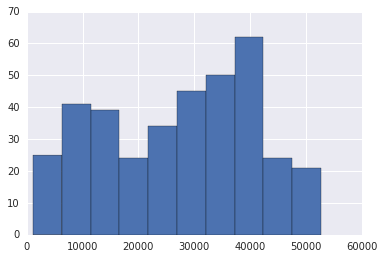

In [26]:
# check out distribution of target variable
plt.hist(y);

In [27]:
# variable correlations
pd.concat([y, X], axis=1).corr()

,num_trips,temp_f_avg,dew_f_avg,humidity_perc_avg,sea_lvl_avg,visibility_avg,wind_mph_avg,precip_inches,Fog,Rain,Snow,Apr,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep,Fri,Mon,Sat,Sun,Thu,Tue,Wed
num_trips,1.00,0.78,0.68,-0.04,-0.09,0.34,-0.48,-0.24,-0.16,-0.18,-0.43,-0.12,0.24,-0.03,-0.43,-0.41,0.18,0.09,-0.37,0.09,0.13,0.27,0.35,0.05,0.03,-0.14,-0.15,0.06,0.05,0.10
temp_f_avg,0.78,1.00,0.94,0.17,-0.27,0.10,-0.53,-0.01,-0.03,0.07,-0.40,-0.04,0.35,-0.10,-0.50,-0.43,0.35,0.23,-0.30,0.19,-0.07,0.02,0.28,-0.01,0.00,-0.04,0.01,-0.00,0.02,0.02
dew_f_avg,0.68,0.94,1.00,0.48,-0.31,-0.14,-0.50,0.17,0.07,0.28,-0.32,-0.11,0.29,-0.02,-0.46,-0.40,0.33,0.26,-0.30,0.14,-0.04,0.02,0.27,-0.03,-0.00,-0.04,0.00,-0.00,0.05,0.02
humidity_perc_avg,-0.04,0.17,0.48,1.00,-0.22,-0.67,-0.05,0.51,0.26,0.64,0.07,-0.15,-0.06,0.19,-0.08,-0.09,0.04,0.17,-0.08,-0.02,0.06,-0.01,0.03,-0.03,-0.02,-0.05,-0.02,0.02,0.09,0.01
sea_lvl_avg,-0.09,-0.27,-0.31,-0.22,1.00,0.17,-0.09,-0.17,-0.17,-0.25,-0.07,-0.11,-0.10,0.06,-0.00,0.07,-0.21,-0.12,0.06,0.11,0.17,0.05,0.03,0.01,0.02,0.08,0.03,-0.02,-0.07,-0.05
visibility_avg,0.34,0.10,-0.14,-0.67,0.17,1.00,-0.03,-0.64,-0.48,-0.59,-0.40,0.07,0.14,-0.11,-0.06,-0.09,0.01,-0.10,-0.11,-0.01,0.07,0.11,0.08,0.04,0.01,-0.02,-0.01,0.01,-0.07,0.04
wind_mph_avg,-0.48,-0.53,-0.50,-0.05,-0.09,-0.03,1.00,0.09,0.05,0.03,0.17,0.16,-0.21,-0.01,0.23,0.27,-0.22,-0.06,0.12,-0.13,-0.03,0.01,-0.12,0.06,0.07,-0.02,-0.05,-0.01,-0.01,-0.04
precip_inches,-0.24,-0.01,0.17,0.51,-0.17,-0.64,0.09,1.00,0.59,0.57,0.14,-0.04,-0.04,0.04,-0.04,0.06,0.02,0.05,0.04,-0.05,-0.04,0.01,-0.00,-0.06,-0.01,-0.01,0.01,0.04,0.02,0.00
Fog,-0.16,-0.03,0.07,0.26,-0.17,-0.48,0.05,0.59,1.00,0.30,0.31,-0.03,-0.03,-0.08,0.02,0.09,0.18,-0.07,0.05,-0.03,-0.07,0.01,-0.03,-0.03,0.00,0.00,0.00,-0.00,0.03,0.00
Rain,-0.18,0.07,0.28,0.64,-0.25,-0.59,0.03,0.57,0.30,1.00,0.01,0.00,-0.07,0.19,-0.10,-0.07,0.02,0.14,0.08,-0.05,-0.04,-0.03,-0.07,-0.07,-0.05,0.00,-0.01,-0.02,0.13,0.02


In [28]:
# highest correlations to target variable
pd.concat([y, X], axis=1).corr()['num_trips'].sort_values(ascending=False)

num_trips                           1.00
temp_f_avg                          0.78
dew_f_avg                           0.68
Sep                                 0.35
visibility_avg                      0.34
Oct                                 0.27
Aug                                 0.24
Jul                                 0.18
Nov                                 0.13
Wed                                 0.10
Jun                                 0.09
May                                 0.09
Thu                                 0.06
Tue                                 0.05
Fri                                 0.05
Mon                                 0.03
Dec                                -0.03
humidity_perc_avg                  -0.04
sea_lvl_avg                        -0.09
Apr                                -0.12
Sat                                -0.14
Sun                                -0.15
Fog                                -0.16
Rain                               -0.18
precip_inches   

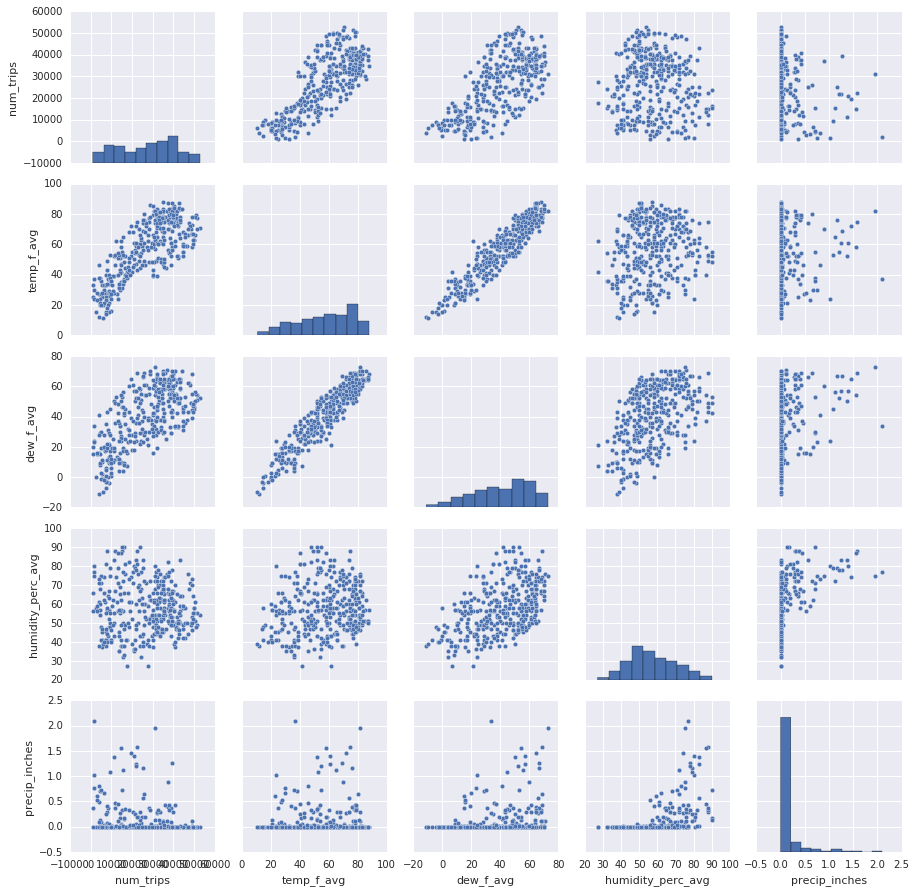

In [29]:
#pair plot
sns.pairplot(citi_df[['num_trips', 'temp_f_avg', 'dew_f_avg', 'humidity_perc_avg', 'precip_inches']]);

In [30]:
# create train and test data
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size=0.25, 
                                                    random_state=5
                                                   )

# Regression Model
lr = LinearRegression()
lr.fit(X_train, y_train)
print lr.score(X_train, y_train)
print lr.score(X_test, y_test)

0.897152393681
0.898737801401


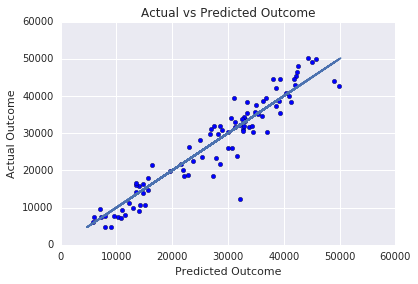

In [31]:
plt.scatter(lr.predict(X_test), y_test)
plt.plot(y_test, y_test)
plt.title('Actual vs Predicted Outcome')
plt.xlabel('Predicted Outcome')
plt.ylabel('Actual Outcome')

In [32]:
# take a look at features
zipped = zip(X.columns, lr.coef_)
features = sorted(zipped, key = lambda x: x[1], reverse=True)
features

[('temp_f_avg', 25323.11206706634),
 ('Oct', 10522.895851048232),
 ('Sep', 9981.131577250555),
 ('Nov', 8025.8447537273878),
 ('Aug', 3017.0544006234272),
 ('Wed', 2752.6034944416779),
 ('Dec', 2498.6681760611796),
 ('Fog', 2346.2050665082647),
 ('Thu', 2117.7669437241657),
 ('Tue', 1910.8629923596623),
 ('visibility_avg', 1860.8303828573496),
 ('Fri', 1435.7853871131108),
 ('Mon', 1063.6492073964362),
 ('Jun', 1045.7718542718285),
 ('Jul', 448.35898677644275),
 ('May', -78.778000126203096),
 ('Snow', -455.51070334929256),
 ('dew_f_avg', -1154.1394809013473),
 ('Rain', -1366.7575225627688),
 ('Sat', -4574.3335820090424),
 ('Sun', -4706.3344430264306),
 ('Apr', -6139.9031048692605),
 ('wind_mph_avg', -9121.8603216672982),
 ('Jan', -9350.168101625668),
 ('humidity_perc_avg', -9874.743821173457),
 ('Feb', -9966.022918067616),
 ('Mar', -10004.85347506749),
 ('precip_inches', -14573.76251515394),
 ('sea_lvl_avg', -139087.87090439102)]

The model has about 90% accuracy. This is not bad for just using time and weather as features. However, we are only using data from one year with 365 training examples, so its likely that our model is overfit. We could improve this model by using more data from previous years. It could also benefit from regulariation. 

### Question 6
- Using the tool of your preference, develop a visualization that displays something interesting about the data. 

In [34]:
citibike_df.head()

,trip_duration,start_time,end_time,start_stn_id,start_stn_name,start_stn_lat,start_stn_long,end_stn_id,end_stn_name,end_stn_lat,end_stn_long,bike_id,user_type,birth_year,gender,date,num_trips
0,1338,2015-06-01 00:00:00,2015-06-01 00:22:00,128,MacDougal St & Prince St,40.73,-74.00,2021,W 45 St & 8 Ave,40.76,-73.99,20721,Subscriber,"1,984.00",1,2015-06-01,1
1,290,2015-06-01 00:00:00,2015-06-01 00:05:00,438,St Marks Pl & 1 Ave,40.73,-73.99,312,Allen St & E Houston St,40.72,-73.99,21606,Subscriber,"1,997.00",1,2015-06-01,1
2,634,2015-06-01 00:01:00,2015-06-01 00:11:00,383,Greenwich Ave & Charles St,40.74,-74.00,388,W 26 St & 10 Ave,40.75,-74.00,16595,Subscriber,"1,993.00",1,2015-06-01,1
3,159,2015-06-01 00:01:00,2015-06-01 00:04:00,361,Allen St & Hester St,40.72,-73.99,531,Forsyth St & Broome St,40.72,-73.99,16949,Subscriber,"1,981.00",1,2015-06-01,1
4,1233,2015-06-01 00:02:00,2015-06-01 00:22:00,382,University Pl & E 14 St,40.73,-73.99,532,S 5 Pl & S 4 St,40.71,-73.96,17028,Customer,nan,0,2015-06-01,1


In [41]:
daily_user = citibike_df.groupby(['date', 'user_type'], as_index=False)['num_trips'].sum()
daily_user.head()

,date,user_type,num_trips
0,2015-01-01,Customer,666
1,2015-01-01,Subscriber,4651
2,2015-01-02,Customer,641
3,2015-01-02,Subscriber,10663
4,2015-01-03,Customer,226


In [42]:
customers = daily_user[daily_user.user_type == 'Customer']
subscibers = daily_user[daily_user.user_type == 'Subscriber']

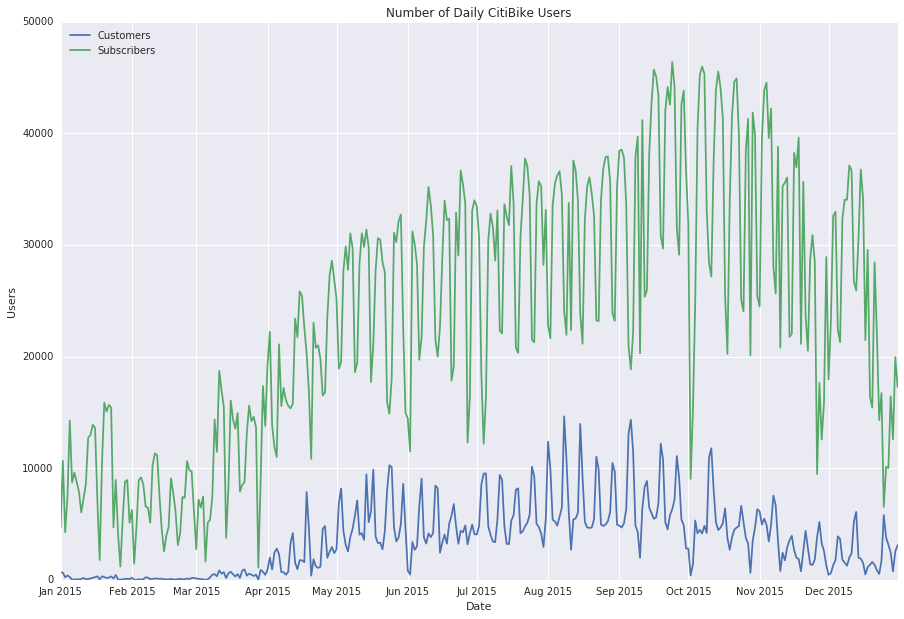

In [56]:
plt.figure(figsize=(15,10))
plt.plot(customers.date, customers.num_trips, label='Customers');
plt.plot(subscibers.date, subscibers.num_trips, label='Subscribers');
plt.title("Number of Daily CitiBike Users");
plt.xlabel("Date")
plt.ylabel("Users")
plt.legend(loc='upper left');